In [1]:
import pandas as pd                 #read,write,etc..
import numpy as np                  #arrays..
import matplotlib.pyplot as plt     #Graph Plotting
import tensorflow as tf             #For training deep learning models
import seaborn as sns
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

#Load the CIFAR 10 dataset which has thousands of images that we can train
(X_train, Y_train),(X_test,Y_test)=datasets.cifar10.load_data()


In [2]:
print(X_test)

[[[[158 112  49]
   [159 111  47]
   [165 116  51]
   ...
   [137  95  36]
   [126  91  36]
   [116  85  33]]

  [[152 112  51]
   [151 110  40]
   [159 114  45]
   ...
   [136  95  31]
   [125  91  32]
   [119  88  34]]

  [[151 110  47]
   [151 109  33]
   [158 111  36]
   ...
   [139  98  34]
   [130  95  34]
   [120  89  33]]

  ...

  [[ 68 124 177]
   [ 42 100 148]
   [ 31  88 137]
   ...
   [ 38  97 146]
   [ 13  64 108]
   [ 40  85 127]]

  [[ 61 116 168]
   [ 49 102 148]
   [ 35  85 132]
   ...
   [ 26  82 130]
   [ 29  82 126]
   [ 20  64 107]]

  [[ 54 107 160]
   [ 56 105 149]
   [ 45  89 132]
   ...
   [ 24  77 124]
   [ 34  84 129]
   [ 21  67 110]]]


 [[[235 235 235]
   [231 231 231]
   [232 232 232]
   ...
   [233 233 233]
   [233 233 233]
   [232 232 232]]

  [[238 238 238]
   [235 235 235]
   [235 235 235]
   ...
   [236 236 236]
   [236 236 236]
   [235 235 235]]

  [[237 237 237]
   [234 234 234]
   [234 234 234]
   ...
   [235 235 235]
   [235 235 235]
   [234 234

In [3]:
print(Y_test)

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [4]:
print(Y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [5]:
print(X_test.shape)
print(X_train.shape)

(10000, 32, 32, 3)
(50000, 32, 32, 3)


In [6]:
#DATA PROCESSING & VISUALIZATION

Y_train=Y_train.reshape(-1)  #reshape helps to structurize the data in a certain order. For converting 2D array to 1D
Y_test=Y_test.reshape(-1)    #i.e. converting all data in a single line

print(Y_train)
print(Y_test)

[6 9 9 ... 9 1 1]
[3 8 8 ... 5 1 7]


In [7]:
Y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

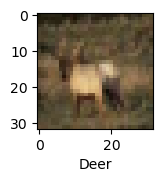

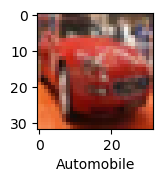

In [8]:
classes=["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]

def plot_sample(X,Y,index,classes):
    plt.figure(figsize=(10,1.5))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])
    plt.show()
    
#Assuming you have X_train, Y_train and classes defined
plot_sample(X_train, Y_train, 3, classes)
plot_sample(X_train, Y_train, 5, classes)

In [9]:
#We need to normalize the data to make the data more suitable for training Neural Networks.
#R-G-B for color has range from 0-255, so that's why 255.
#If we multiply a large number by any no. say, 10000x2=20000, 15000x3=30000, ... anyways, the no. increases.
#But its very difficult to handle large values. Only way to decrease and normalize is to divide, rather than +,-,x,%
X_train=X_train/255.0  #Normalize the images to values between 0 & 1.
X_test=X_test/255.0 

In [10]:
#SET UP BASIC ANN(ARTIFICIAL NEURAL NETWORK) to perform training.(make the machine to make predictions)
ann = models.Sequential([  #Ann variable contains model
    layers.Flatten(input_shape=(32,32,3)),  #First layer flattening layer for converting into 1D array. 
    layers.Dense(3000, activation ='relu'), #For learning complex data patterns
    layers.Dense(1000, activation ='relu'),
    layers.Dense(10, activation ='softmax')])
#The flatten layer lies between the CNN and the ANN, and its job is to convert the output of the CNN into an input
#that the ANN can process

#Compile the model with appropriate loss function and optimizer
ann.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy']) #compiling model    
#SGD-Stochastic Gradient Descent

#Train the model
ann.fit(X_train, Y_train, epochs=5)




Epoch 1/5


1563/1563 [==============================] - 91s 57ms/step - loss: 1.8111 - accuracy: 0.3549
Epoch 2/5
1563/1563 [==============================] - 87s 55ms/step - loss: 1.6242 - accuracy: 0.4246
Epoch 3/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.5422 - accuracy: 0.4564
Epoch 4/5
1563/1563 [==============================] - 82s 53ms/step - loss: 1.4819 - accuracy: 0.4779
Epoch 5/5
1563/1563 [==============================] - 74s 47ms/step - loss: 1.4310 - accuracy: 0.4963


In [11]:
#Evaluate the ANN model
from sklearn.metrics import confusion_matrix, classification_report
Y_pred=ann.predict(X_test)
Y_pred_classes=[np.argmax(element) for element in Y_pred]  #giving classes to all the y_predictions (animal,bird,frog,...)
print("Classification Report : \n", classification_report(Y_test,Y_pred_classes))


313/313 [==============================] - 2s 7ms/step
Classification Report : 
               precision    recall  f1-score   support

           0       0.69      0.40      0.51      1000
           1       0.61      0.59      0.60      1000
           2       0.33      0.41      0.36      1000
           3       0.38      0.28      0.32      1000
           4       0.55      0.19      0.28      1000
           5       0.44      0.36      0.40      1000
           6       0.38      0.80      0.51      1000
           7       0.59      0.51      0.55      1000
           8       0.54      0.70      0.61      1000
           9       0.54      0.56      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



In [13]:
#Build a Convulational Neural Network (CNN) model to-TRAIN THE IMAGES.ANN is only for predicting other things, not images.
cnn = models.Sequential([
      layers.Conv2D(filters=32, kernel_size=(3,3), activation ='relu', input_shape=(32,32,3)),
      layers.MaxPooling2D(pool_size=(2,2)),  #Reducing the computation.to reduce the size of feature maps, 
                              #which in turn makes computation faster because the number of training parameters is reduced
      layers.Conv2D(filters=32, kernel_size=(3,3), activation ='relu'),
      layers.MaxPooling2D(pool_size=(2,2)),
      layers.Flatten(),
      layers.Dense(64, activation ='relu'),
      layers.Dense(10, activation ='softmax') ])

cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

cnn.fit(X_train, Y_train, epochs=10)





Epoch 1/10
1563/1563 [==============================] - 14s 8ms/step - loss: 1.4914 - accuracy: 0.4622
Epoch 2/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.1525 - accuracy: 0.5932
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0314 - accuracy: 0.6369
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9591 - accuracy: 0.6651
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8992 - accuracy: 0.6860
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8504 - accuracy: 0.7045
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8093 - accuracy: 0.7171
Epoch 8/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7710 - accuracy: 0.7309
Epoch 9/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.7363 - accuracy: 0.7411
Epoch 10/10
1563/1563 [==============================] - 12s 8ms/step - 

313/313 [==============================] - 2s 6ms/step


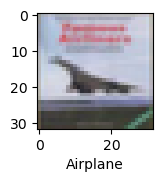

'Ship'

In [16]:
#Evaluate the CNN model
cnn.evaluate(X_test, Y_test)
Y_pred=cnn.predict(X_test)
Y_classes=[np.argmax(element) for element in Y_pred]
Y_classes[:5]
Y_test[:5]

plot_sample(X_test, Y_test, 3, classes)
classes[Y_classes[3]]
classes[Y_classes[2]]